In [1]:
# importing libraries for data loading and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# loading inital thread and comment data

threads_headers = ['text', 'title', 'url', 'id', 'subreddit', 'meta', 'time', 'author', 'ups', 'downs', 'authorlinkkarma', 'authorcommentkarma', 'authorisgold']
comments_headers = ['text', 'id', 'subreddit', 'meta', 'time', 'author', 'ups', 'downs', 'authorlinkkarma', 'authorcommentkarma', 'authorisgold']

threads = pd.read_csv("data/threads.csv", header = None, names = threads_headers)
comments = pd.read_csv("data/comments.csv", header = None, names = comments_headers)

In [3]:
# creating new column for comment length

comment_length = []

for row in comments['text']:
    if pd.isnull(row):
        comment_length.append(0)
    else:
        comment_length.append(len(row))
    
comments['comment_length'] = comment_length

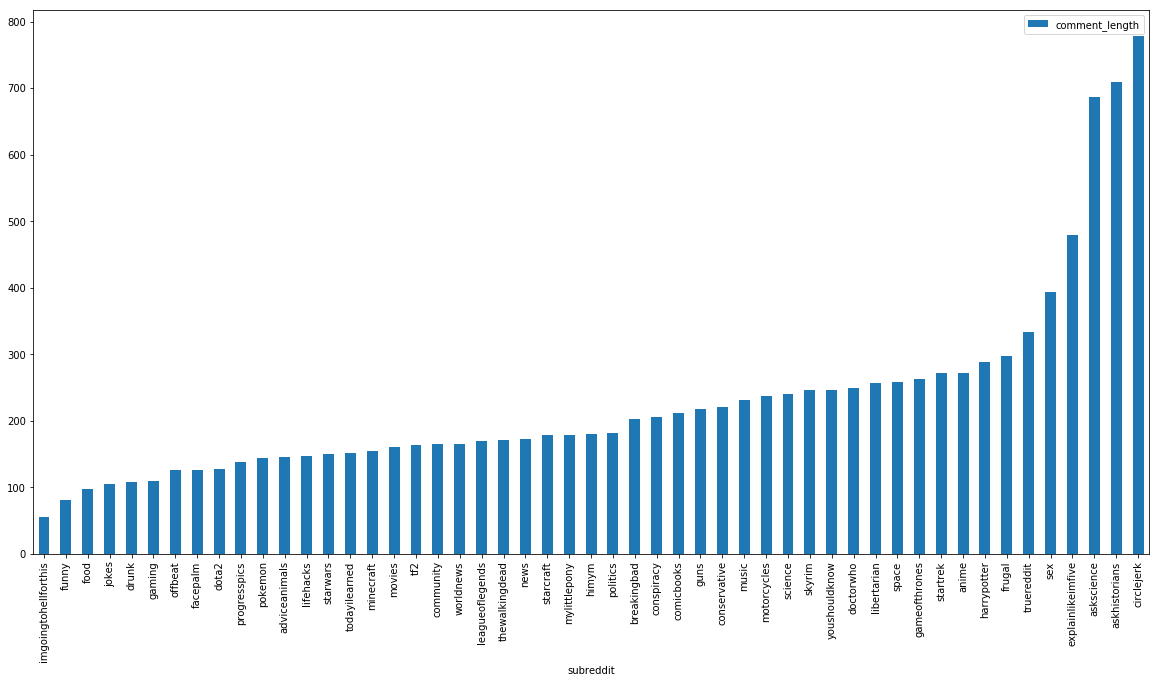

In [10]:
# looking at average comment length by subreddit

subreddit_length = comments.groupby('subreddit', as_index=False)['comment_length'].mean().sort_values('comment_length')

plt.figure()
subreddit_length.plot.bar(x = 'subreddit', y = 'comment_length', figsize=(20,10))
plt.show()

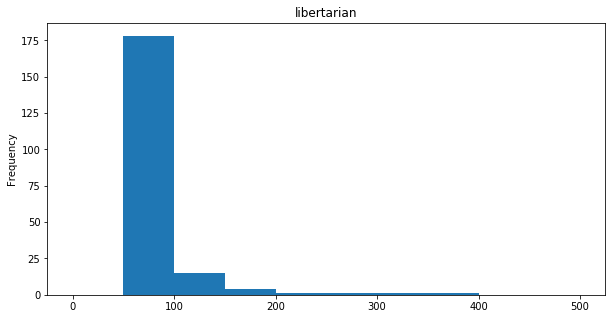

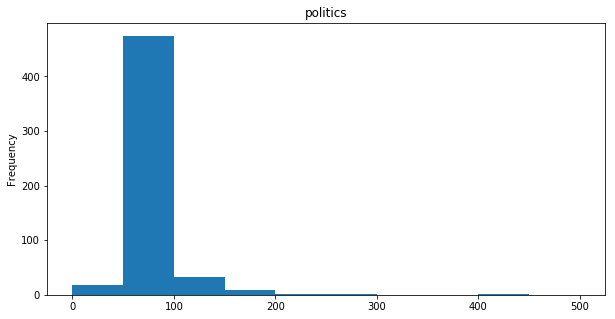

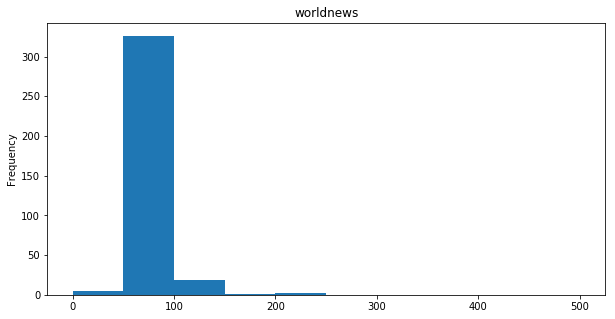

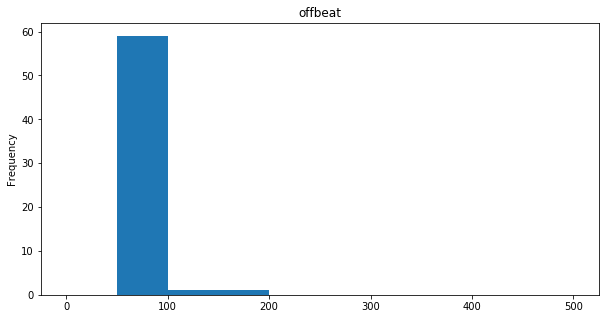

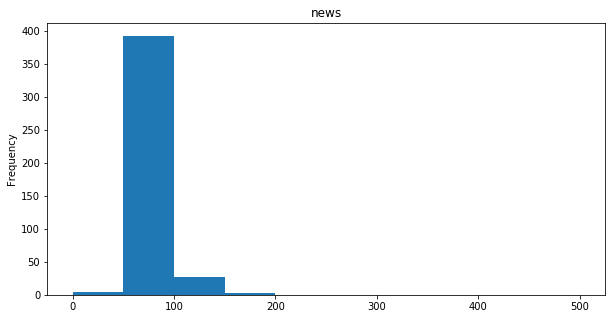

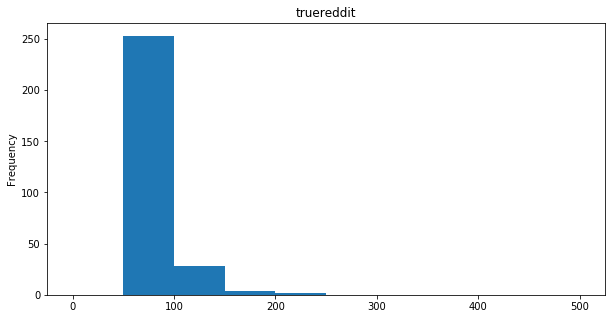

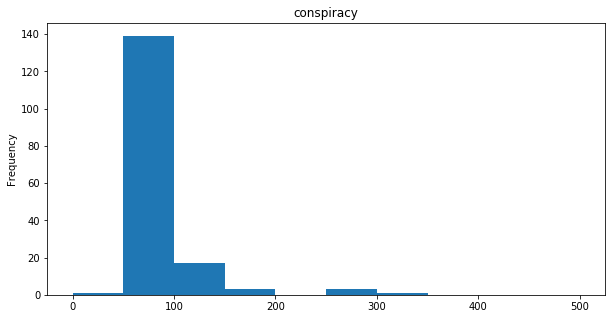

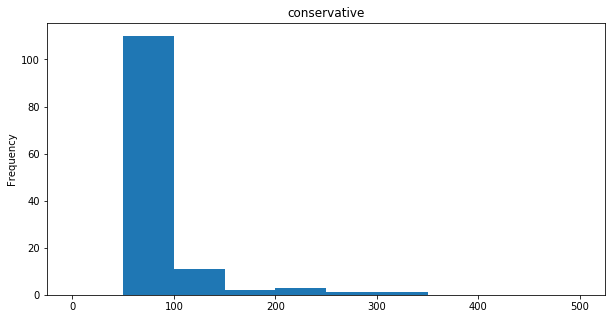

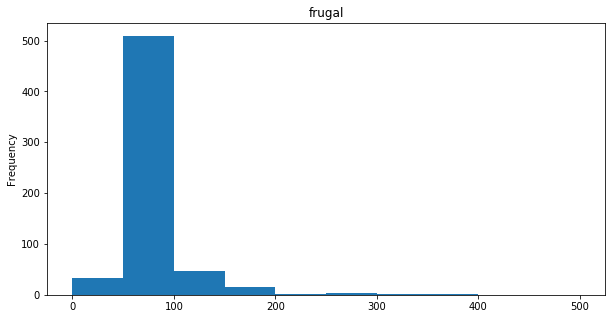

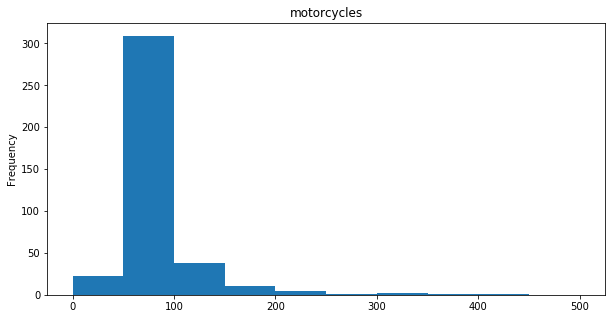

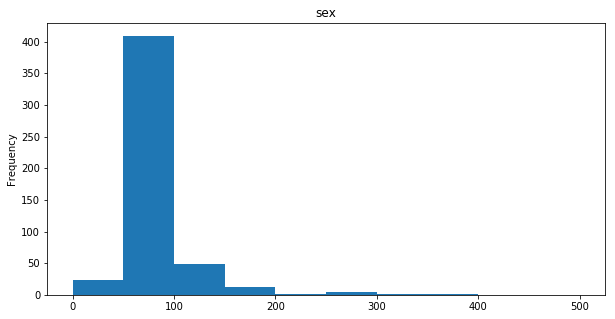

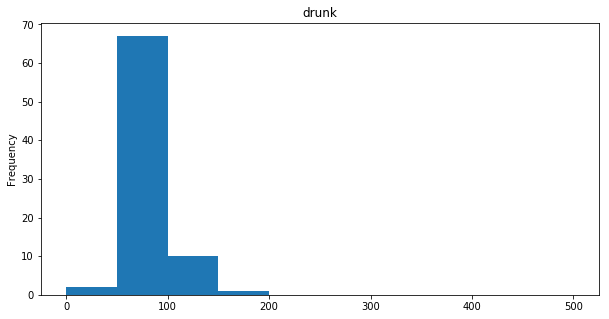

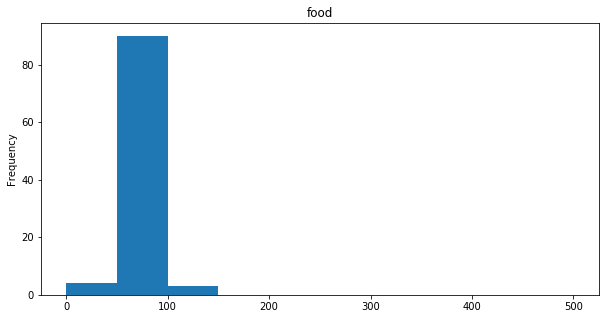

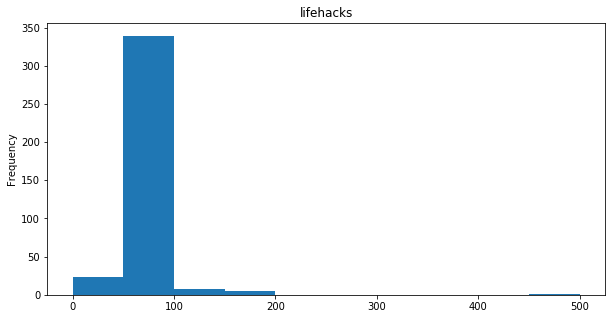

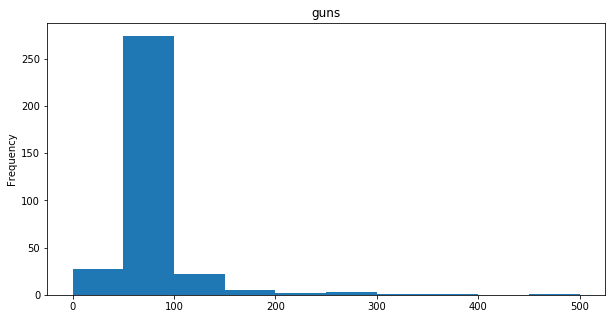

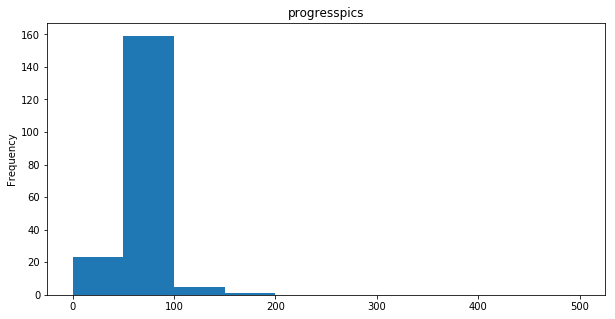

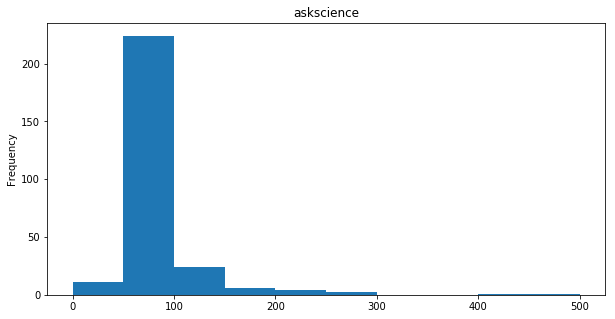

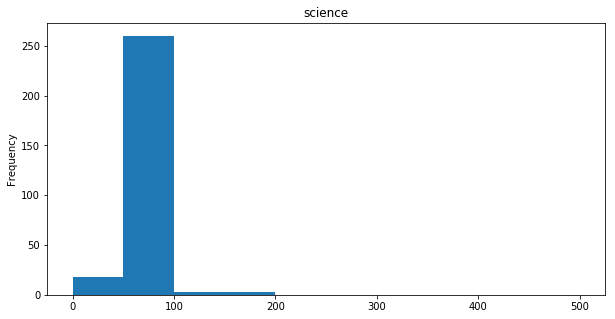

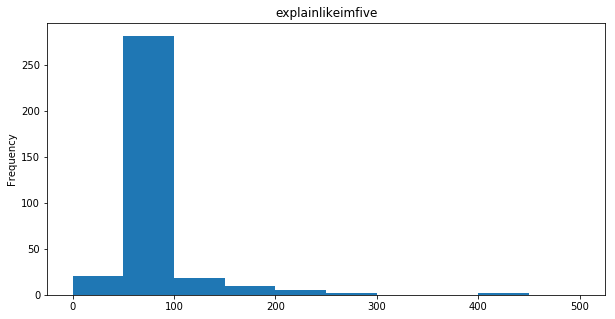

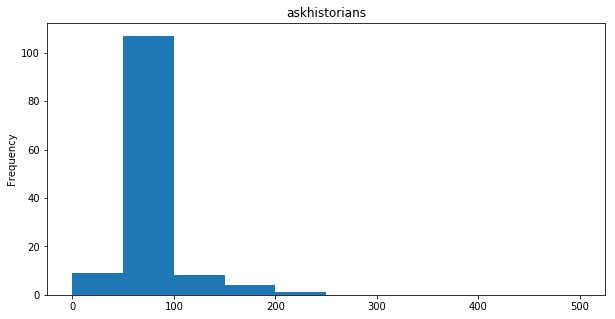

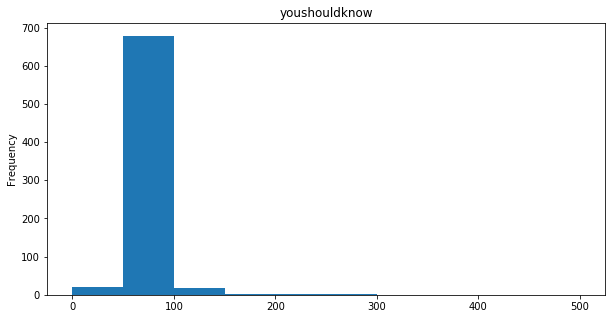

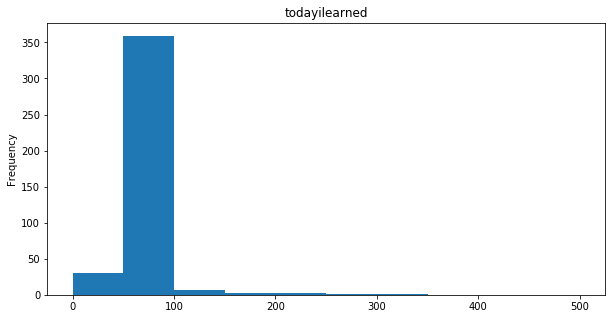

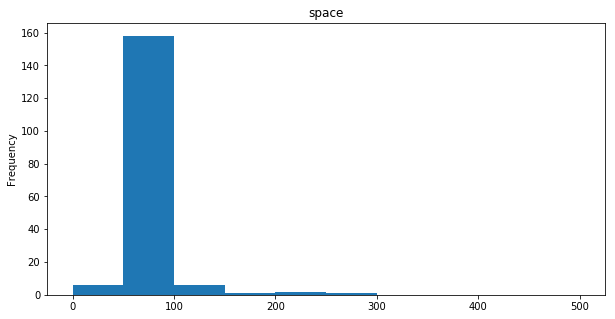

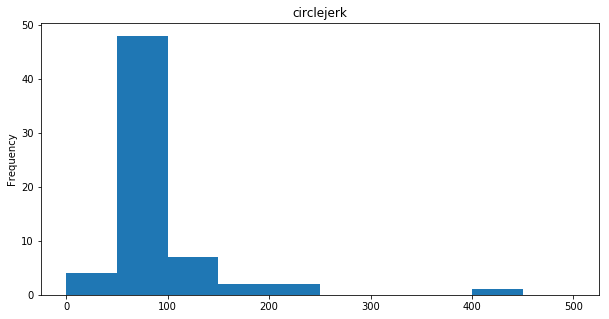

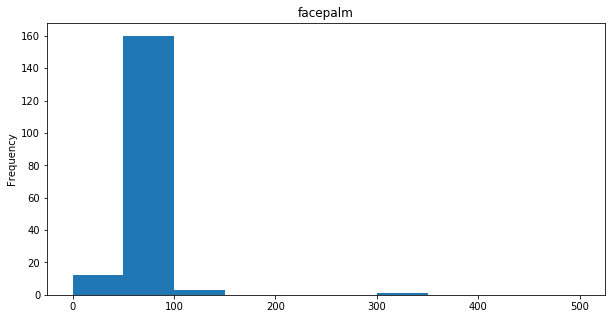

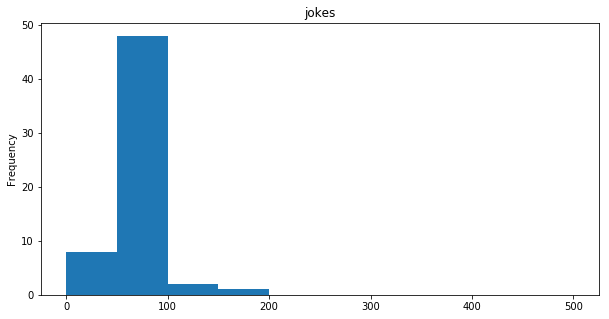

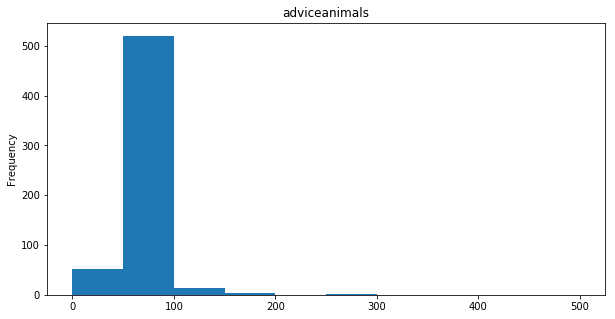

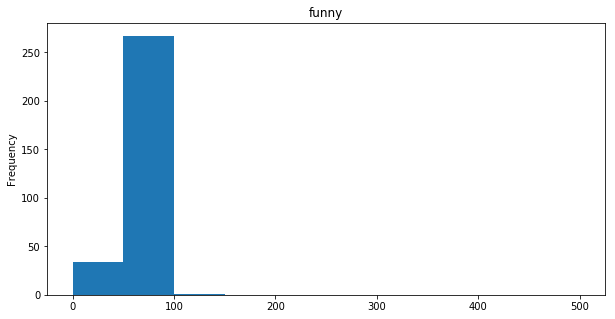

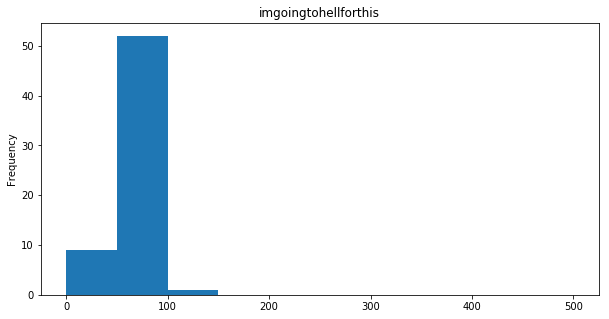

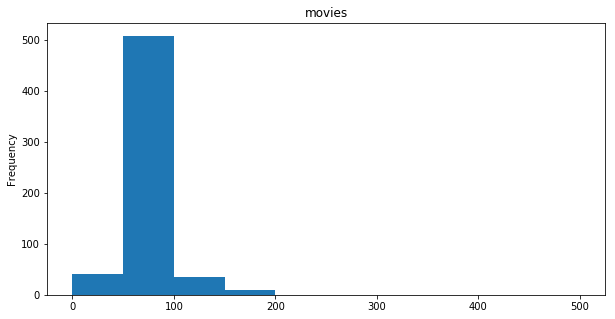

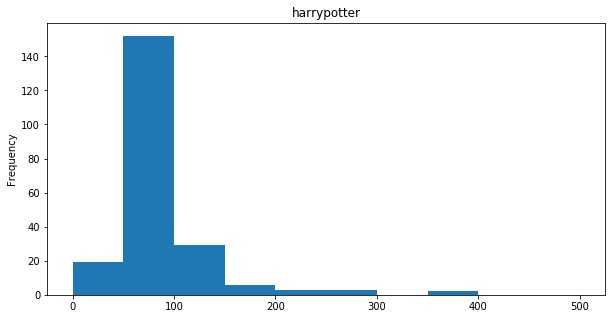

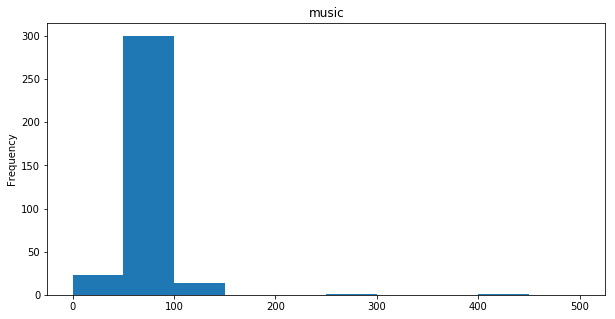

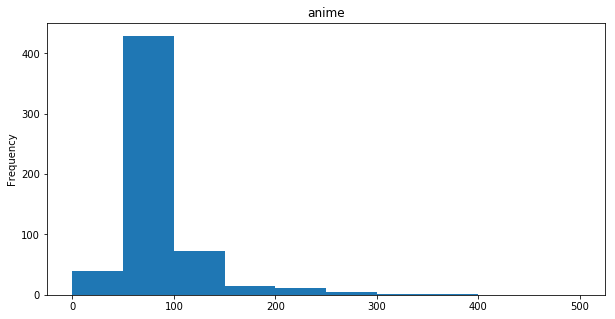

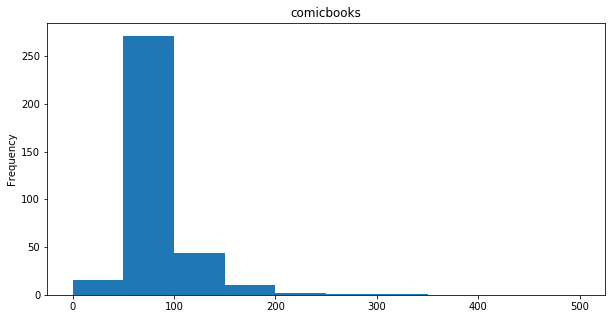

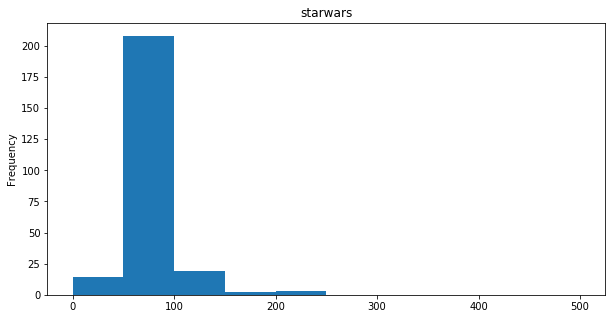

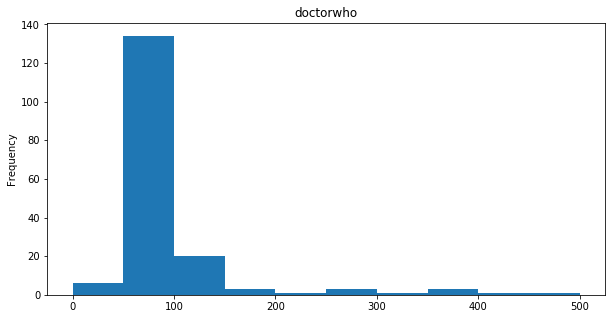

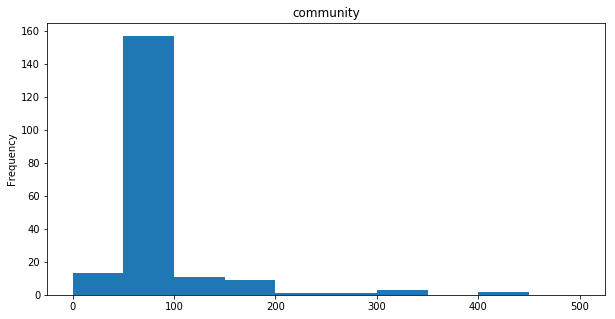

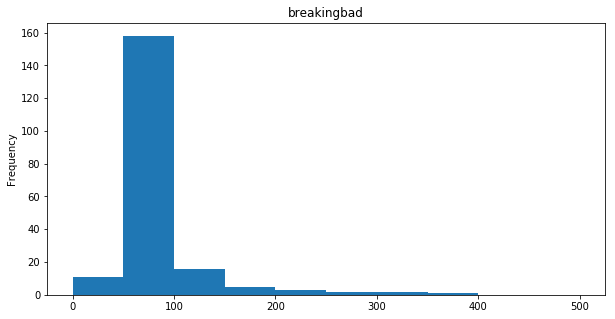

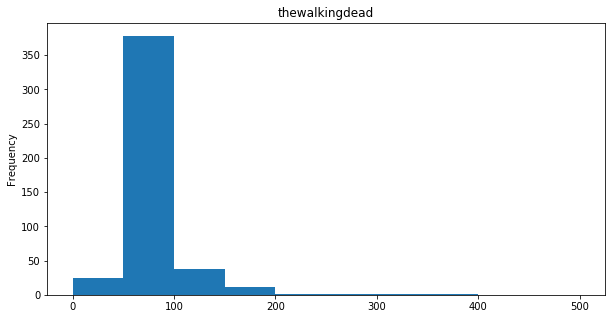

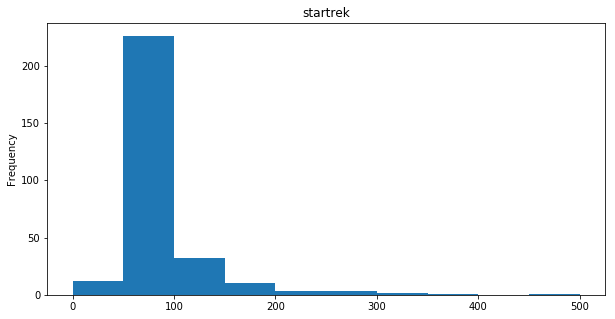

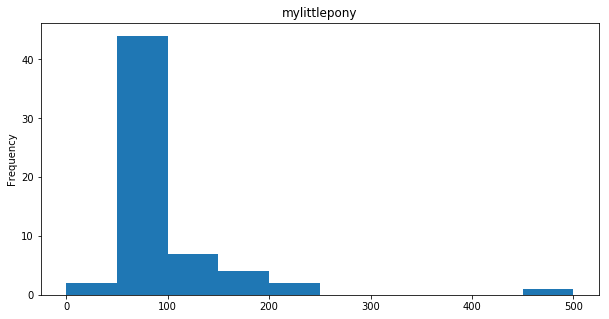

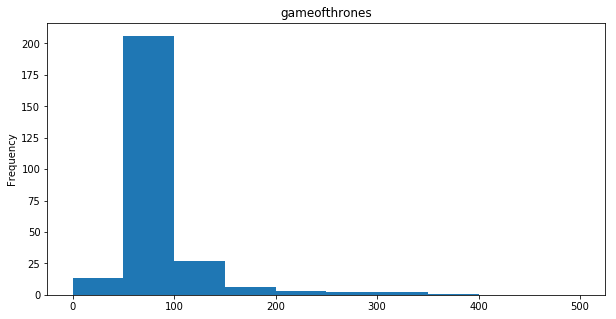

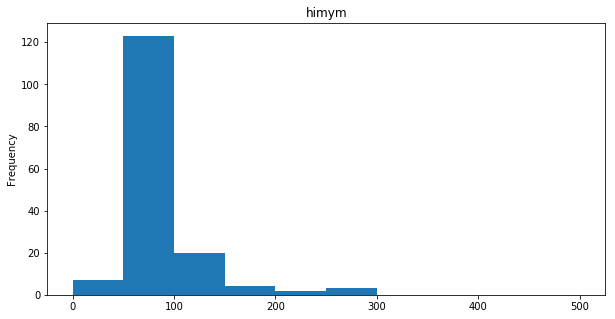

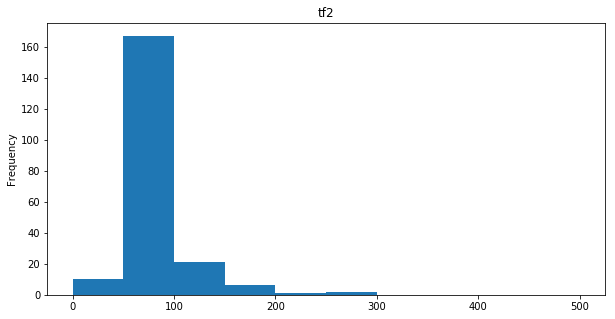

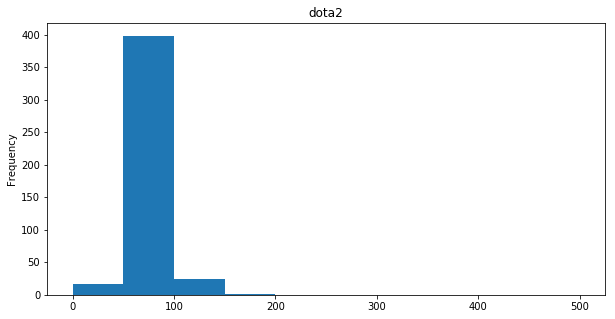

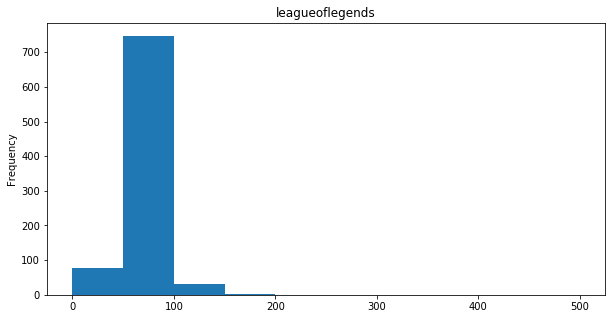

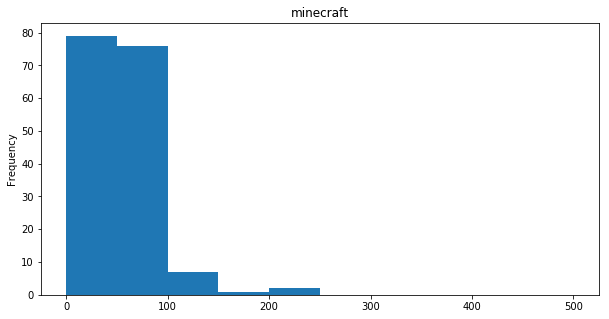

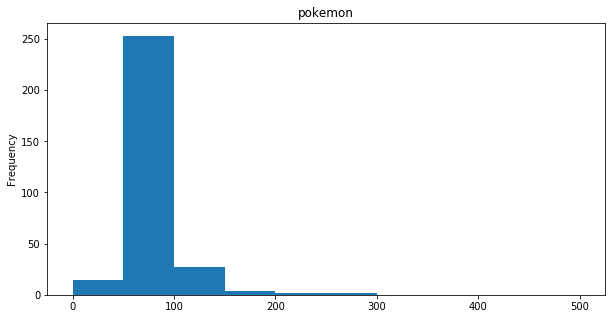

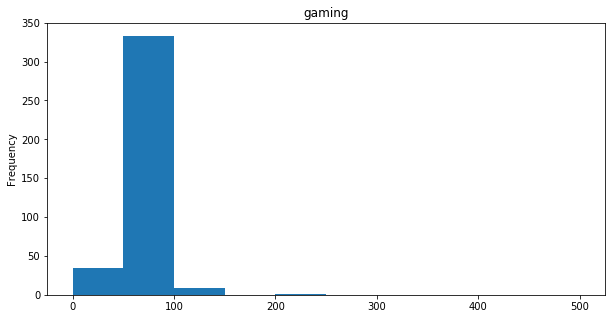

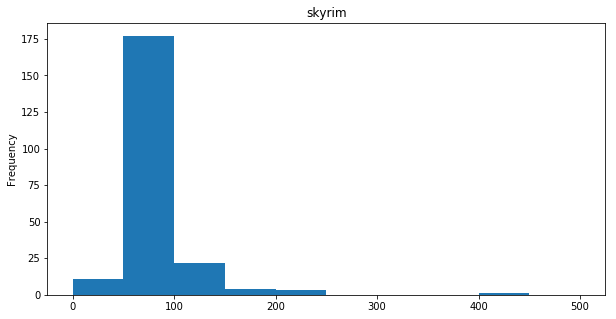

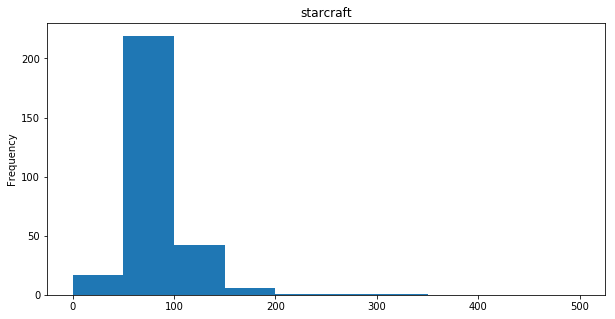

In [19]:
# looking at histograms of number of comments per author by subreddit

#print(comments[(comments.subreddit == 'politics') & (comments.comment_length > 140)]['author'].value_counts())

for sub in comments['subreddit'].unique():
    sub_authors = comments[(comments.subreddit == sub) & (comments.comment_length > 140)]['author'].value_counts()
    
    plt.figure()
    sub_authors.plot.hist(title = sub, figsize=(10,5), bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])
    plt.show()


In [26]:
# creating dataframe containing only comment text and author for the selected subreddit for modeling

model_input = comments[(comments.subreddit == 'harrypotter') & (comments.comment_length > 50)][['author', 'text']]

model_input_top_50 = model_input['author'].value_counts()

print(model_input_top_50[:50])





Mrsphysics              518
managed_mischief_       400
katapotamus             399
poufsouffle_pants       350
JuniorAL                350
muted90                 350
Crispy385               300
MacabreGoblin           299
apprberriepie           249
starazona               225
AthosN8                 218
elkor101                200
bisonburgers            200
alexi_lupin             200
Captain-_-Falcon        200
HonkMyTonks             200
just-a-tv-nerd          200
Narsil098               199
ciocinanci              199
SiriuslyLoki731         150
zsmg                    150
YoureSoVaneRomilda      150
ruelaurent              150
rodaem                  150
ravenclaw1991           149
bugcatcher_billy        100
palcatraz               100
ebpohmr                 100
Jade3d                  100
Feminist_Cat            100
cheeseygritz            100
YoMamasAMudblood        100
oh_orpheus              100
Platycakes              100
GoodniteMush            100
DuyDao              